# Ein kleines Bild in ein großes Bild kopieren

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

2024-10-29 08:45:48.396181: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 08:45:49.860109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

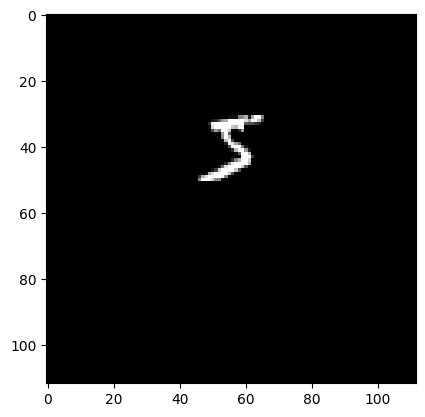

In [17]:
import numpy as np
S = 28*4
big_img = np.zeros((S,S))

x = S//2-14
y = S//2-30
big_img[y:y+28,x:x+28] = x_train[0,:,:]

import matplotlib.pyplot as plt
plt.imshow(big_img, cmap="gray")
#plt.colorbar()
plt.show()

In [4]:
big_img.shape

(112, 112)

# Ziffern an zufällige Koordinaten kopieren

In [21]:
import random
random.randint(a=0, b=28)

6

In [25]:
s*4

112

In [26]:
big_img.shape

(112, 112)

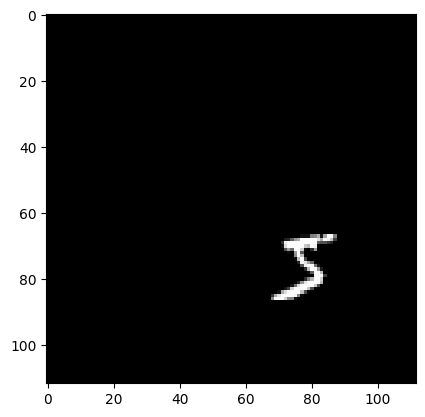

In [40]:
import numpy as np
import random

small_img = x_train[0,:,:]
s = small_img.shape[0]

S = s*4
big_img = np.zeros((S,S))

x = random.randint(a=0, b=S-s)
y = random.randint(a=0, b=S-s)
big_img[y:y+s,x:x+s] = small_img

import matplotlib.pyplot as plt
plt.imshow(big_img, cmap="gray")
#plt.colorbar()
plt.show()

# LargeMNIST Datensatz erzeugen

In [9]:
import tensorflow as tf
import numpy
import random

mnist = tf.keras.datasets.mnist
(x_train_m, y_train_m),(x_test_m, y_test_m) = mnist.load_data()

s = x_train_m.shape[1]
S = s*4

# soll die Shape haben (60000, S, S)
N = 60000
x_train = numpy.zeros( (N,S,S) )
y_train = numpy.zeros( N )

for i in range(N):        
    x = random.randint(a=0, b=S-s)
    y = random.randint(a=0, b=S-s)
    x_train[i, y:y+s,x:x+s] = x_train_m[i,:,:]

y_train = y_train_m.copy()

In [10]:
x_train.shape

(60000, 112, 112)

In [11]:
y_train.shape

(60000,)

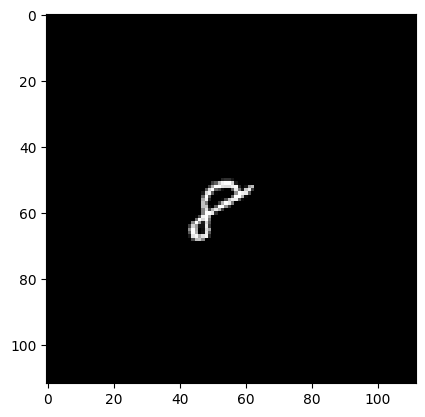

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[-1], cmap="gray")
plt.show()

In [26]:
y_train[2]

4

# Ein MLP für LargeMNIST

In [14]:
import tensorflow as tf
import numpy
import random

mnist = tf.keras.datasets.mnist
(x_train_m, y_train_m),(x_test_m, y_test_m) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def get_large_dataset(x_orig,y_orig, scale_factor=4):

    N = x_orig.shape[0]
    s = x_orig.shape[1]
    
    S = s*scale_factor    
    x = numpy.zeros( (N,S,S) )
    y = y_orig.copy()
        
    for i in range(N):        
        xc = random.randint(a=0, b=S-s)
        yc = random.randint(a=0, b=S-s)
        x[i, yc:yc+s,xc:xc+s] = x_orig[i,:,:]

    return x,y,S

x_train, y_train, S = get_large_dataset(x_train_m, y_train_m)
x_test,  y_test, S  = get_large_dataset(x_test_m,  y_test_m)

In [23]:
x_train.shape

(60000, 112, 112)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 112, 112)

In [6]:
y_test.shape

(10000,)

In [16]:
import tensorflow
tensorflow.__version__

'2.16.1'

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(S, S)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,050 (6.13 MB)

 Trainable params: 1,607,050 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2024-10-30 05:49:28.144236: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3010560000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.1269 - loss: 11.0680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.1578 - loss: 2.3052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.1770 - loss: 2.2116
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.1920 - loss: 2.1281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2054 - loss: 2.0900


In [19]:
128*(112*112)

1605632

In [22]:
128*(112*112) + 128

1605760

In [25]:
x_train.shape

(60000, 112, 112)

In [27]:
60000*112*112*4

3010560000

In [29]:
def get_accuracy_for_test_data(model, x,y):
    
    import numpy
    nr_tests = x.shape[0]    
    correct = 0
    preds = model.predict( x, verbose=0)    
    for test_nr in range(nr_tests):        
        
        # identify the class
        pred_label = numpy.argmax(preds[test_nr])        
        
        # get the ground truth label
        gt_label = y_test[test_nr]
        
        # compare predicted and actual class
        if pred_label == gt_label:
            correct += 1
    
    correct_percent = (correct/nr_tests)*100
    return correct, correct_percent

correct, correct_percent = get_accuracy_for_test_data(model, x_test, y_test)
print(f"Correct: {correct} ({correct_percent:.2f}%) Total: {x_test.shape[0]}")

Correct: 1908 (19.08%) Total: 10000
